## Phân tích nhân tố khám phá (EFA- Exploratory Factor Analysis)


## 1. Phân tích dữ liệu khám phá là gì?

- Phương pháp phân tích nhân tố khám phá EFA (Exploratory Factor Analysis, gọi tắt là phương pháp EFA) giúp chúng ta đánh giá hai loại giá trị quan trọng của thang đo là giá trị hội tụ và giá trị phân biệt.
- Phương pháp phân tích nhân tố EFA thuộc nhóm phân tích đa biến phụ thuộc lẫn nhau (interdependence techniques), nghĩa là không có biến phụ thuộc và biến độc lập mà nó dựa vào mối tương quan giữa các biến với nhau (interrelationships). EFA dùng để rút gọn một tập k biến quan sát thành một tập F (F<k) các nhân tố có ý nghĩa hơn. Cơ sở của việc rút gọn này dựa vào mối quan hệ tuyến tính của các nhân tố với các biến nguyên thủy (biến quan sát).

## 2. Dữ liệu và phương pháp

- Bộ dữ liệu: Nhận thức về một số thương hiệu ngân hàng ở Việt Nam hiện nay.
Dữ liệu được khảo sát theo bộ câu hỏi dưới dây sử dụng thang đo Likert đối với 6 ngân hàng sau: Ngân hàng TMCP Á châu , Ngân hàng TMCP Đông Á, Ngân hàng TMCP Nam Á, Ngân hàng TMCP Sài Gòn Thương tín, Ngân hàng TMCP Sài Gòn, Ngân hàng TMCP Ngoại thương.


| Tên biến | Nội dung |
|---|---|
|c1 |NB1-Biết ngân hàng|
|c2 |NB2-Phân biệt với ngân hàng khác|
|c3 |NB3-Nội dung tên ngân hàng |
|c4 |NB4-Nhận biết logo|
|c5 |NB5-Nhớ màu sắc|
|c6 |CL1-Được đối xử như quý khách|
|c7 |CL2-CSVC an toàn|
|c8 |CL3-Thủ tục nhanh gọn|
|c9 |CL4-Giá phí tương xứng chất lượng|
|c10 |CL5-Nhân viên ăn mặc lịch sự|
|c11 |CL6-Nhân viên đáp ứng đúng nhu cầu khách hàng|
|c12 |CL7-Nhân viên giải quyết sự cố khéo léo|
|c13 |CL8-Điểm giao dịch tiện nghi|
|c14 |CL9-Bầu không khí chuyên nghiệp|
|c15 |HA1-Ngân hàng chuyên dịch vụ tài chính|
|c16 |HA2-Ngân hàng có sản phẩm dịch vụ đa dạng|
|c17 |HA3-Ban lãnh đạo ngân hàng giỏi quản lý|
|c18 |HA4-Ngân hàng có thành tích cao|
|c19 |HA5-Ngân hàng đáng tin cậy|
|c20 |HA6-Ngân hàng có điểm giao dịch khắp tỉnh thành|
|c21 |TT1-Vẫn sử dụng dịch vụ ngân hàng X|
|c22 |TT2-Sẽ nghĩ ngay đến ngân hàng X khi có nhu cầu|
|c23 |TT3-Sẽ sử dụng ngân hàng X lâu dài|

- Phương pháp: Sử dụng các thư viện trong python để phân tích EFA.

## 3. Các bước thực hiện trên Python

In [ ]:
## Gọi các thư viện cần thiết cho phân tích nhân tố khám phá

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

In [ ]:
## Mở file dữ liệu

In [17]:
df= pd.read_excel(r"C:\Users\thanh\Downloads\THNN.xlsx", index_col=0)

Để thõa mãn các yêu cầu phân tích nhân tố khám phá, ta cần thực hiện một số kiểm định như KMO và kiểm định Bartlett.
- Đối với kiểm định Bartlett, kết quả có ý nghĩa thống kê khi p-Value<0.05. Điều này tương ứng với việc các biến có tương quan trong tổng thể.
- Tiếp theo là hệ số KMO (Kaiser-Meyer-Olkin) chỉ số này nằm trong khoảng [0.5;1] được cho là thích hợp để phân tích nhân tố, chỉ số này càng lớn càng có ý nghĩa trong phân tích này.

In [20]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df)
chi_square_value, p_value

(3263.7987764738036, 0.0)

In [22]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df)

In [23]:
kmo_model

0.8972495674490817

In [ ]:
## Lựa chọn số lượng nhân tố.

In [26]:
fa = FactorAnalyzer()
fa.fit(df)
ev, v = fa.get_eigenvalues()
ev

array([7.06268185, 2.08994666, 1.36020958, 1.10418477, 1.02545084,
       0.97012688, 0.90346728, 0.83103438, 0.77171372, 0.71583862,
       0.66054972, 0.62024572, 0.61054745, 0.57222973, 0.53812565,
       0.50363481, 0.49187491, 0.43128205, 0.41812737, 0.38095628,
       0.35624982, 0.31178338, 0.26973854])

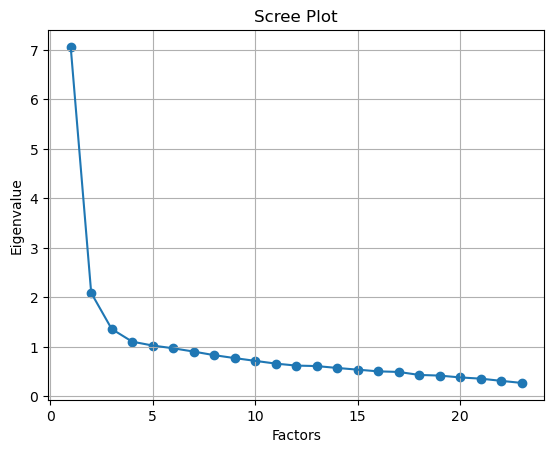

In [27]:
plt.scatter(range(1,df.shape[1]+1),ev)
plt.plot(range(1,df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

Với bộ dữ liệu phân tích, các câu hỏi đã được phân chia thành 4 nhân tố chính. Và kết quả có được từ quy tắc Kaiser cũng như kết quả trực quan bằng đồ thị đều cho kết quả là 4 nhân tố. Ở đây cũng có thể lựa chọn 5 nhân tố nhưng để tương ứng với bộ dữ liệu ta chọn tải các biến vào 4 nhân tố theo bộ câu hỏi ban đầu.

In [37]:
## Tiến hành phân tích nhân tố với số nhân tố là 4 và kiểu xoay là xoay trực giao.
fa = FactorAnalyzer(n_factors=4,rotation='varimax')
fa.fit(df)

FactorAnalyzer(n_factors=4, rotation='varimax', rotation_kwargs={})

In [38]:
factor_df=pd.DataFrame(fa.loadings_,index=df.columns)
print(factor_df)

            0         1         2         3
c1   0.147716  0.105501  0.459411 -0.025632
c2   0.087049  0.094909  0.578197  0.046520
c3   0.084315  0.221929  0.590010 -0.031510
c4   0.034455  0.065232  0.767725  0.157775
c5   0.171699  0.120214  0.610290  0.224554
c6   0.552499  0.178612  0.163560  0.114898
c7   0.469289  0.293012  0.199120 -0.002355
c8   0.540587  0.076098  0.180216  0.123986
c9   0.561543  0.125527  0.088840  0.103530
c10  0.461512  0.237276  0.123137  0.095426
c11  0.697848  0.166049  0.071384  0.167755
c12  0.695982  0.239974  0.005309  0.141142
c13  0.499034  0.225785  0.028278  0.099637
c14  0.571614  0.276817  0.166306  0.194950
c15  0.262468  0.372801  0.125212  0.155503
c16  0.207307  0.458442  0.217542  0.144420
c17  0.256518  0.639562  0.120998  0.150553
c18  0.209337  0.634046  0.230652  0.126895
c19  0.314943  0.521785  0.103456  0.129867
c20  0.259081  0.216502  0.207367  0.140116
c21  0.251041  0.249197  0.103241  0.801681
c22  0.370031  0.304259  0.15237

Như vậy, các biến đã được tải vào từng nhân tố phù hợp:
- Nhân tố 1: các biến c6, c7, c8, c9, c10, c11, c12, c13, c14. Tương ứng với Chất lượng của các ngân hàng.
- Nhân tố 2: các biến c15, c16, c17, c18, c19. Tương ứng với Hình ảnh ngân hàng.
- Nhân tố 3: các biến c1, c2, c3, c4, c5. Tương ứng với Nhận diện ngân hàng.
- Nhân tố 4: các biến c21, c22, c23. Tương ứng với Trung thành với ngân hàng.
Riêng c20 sau khi phân tích nhân tố không được tải về bất kì nhân tố nào. Đồng nghĩa với việc biến này nên được loại bỏ khỏi mô hình trước khi thực hiện các bước tiếp theo trong phân tích dữ liệu đa biến.